In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import time
from scipy import stats
import datetime
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
 
import  os
import random
import math 
 
from sklearn.model_selection import train_test_split
import xgboost as xgb
 
random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df=pd.read_csv('/content/drive/My Drive/IoT Intrusion Dataset 2020.csv')

Mounted at /content/drive


In [ ]:
import ipaddress
df['Src_IP'] = df['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst_IP'] = df['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Timestamp']=pd.to_datetime(df['Timestamp']).astype(int)/10**9
le=LabelEncoder()
df.Flow_ID=LabelEncoder().fit_transform(df.Flow_ID).astype(int)
df.Sub_Cat=le.fit_transform(df.Sub_Cat).astype('int')
df.Label=LabelEncoder().fit_transform(df.Label).astype('int')
df.Cat=LabelEncoder().fit_transform(df.Cat).astype('int')
df.describe(include='all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783.000000,6.257830e+05,625783.000000,6.257830e+05,625783.000000,625783.000000,6.257830e+05,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,6.257830e+05,6.257830e+05,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.0,625783.000000,625783.0,625783.000000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.0,625783.0,625783.0,625783.0,625783.0,625783.0,625783.000000,625783.000000,625783.00000,625783.000000,625783.0,625783.000000,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,28079.323058,3.024599e+09,35026.156190,3.211216e+09,16387.027479,9.971436,1.000000e-09,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,373.556651,28.161094,681.424563,588.665338,637.107254,62.991166,inf,inf,483.462553,63.136879,565.820169,443.103039,102.157949,52.515505,27.689250,85.024112,34.679327,516.792743,446.964592,28.790664,486.704898,428.857417,0.0,0.026410,0.0,0.000051,...,633.666814,102.553417,69676.670746,0.000527,0.092946,0.000486,0.026410,0.530475,0.000051,0.000206,0.000067,0.364652,915.246266,373.556651,637.107254,0.0,0.0,0.0,0.0,0.0,0.0,1.675566,570.738980,1.46853,929.280973,-1.0,5880.924744,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459,0.064037,2.058237,4.052426
std,21216.447228,5.777931e+08,24721.047752,4.942313e+08,17550.363037,5.379857,7.682446e-21,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,596.552835,144.356190,694.997621,682.938908,669.563565,227.773332,NaN,NaN,1892.861521,1159.713184,2866.325298,1719.332813,2216.304460,1212.002429,959.023292,1935.611451,1000.385742,3147.286789,2242.463582,808.672338,2751.967326,2177.830162,0.0,0.160352,0.0,0.007151,...,652.306047,243.227387,179138.678822,0.022958,0.290357,0.022035,0.160352,0.499071,0.007151,0.014356,0.008192,0.499153,948.679333,596.552835,669.563565,0.0,0.0,0.0,0.0,0.0,0.0,4.309970,1161.873195,1.21949,1731.760875,0.0,11529.622909,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971,0.244818,0.988888,2.166035
min,0.000000,2.998509e+07,0.000000,1.600000e+01,0.000000,0.000000,1.000000e-09,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000540e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,3232235533,10000,3232235536,10101,17,1.000000e-09,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,22760,3735073668,2179,3232235533,554,6,1.000000e-09,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,12691,3232235536,52727,3232235533,9020,6,1.000000e-09,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,12704,3232235536,52964,3232235533,9020,6,1.000000e-09,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,611,3232235521,36763,4026531834,1900,17,1.000000e-09,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


In [ ]:
le.classes_

array(['DoS-Synflooding', 'MITM ARP Spoofing', 'Mirai-Ackflooding',
       'Mirai-HTTP Flooding', 'Mirai-Hostbruteforceg',
       'Mirai-UDP Flooding', 'Normal', 'Scan Hostport', 'Scan Port OS'],
      dtype=object)

In [ ]:
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df = df.astype(int)

In [ ]:
x1=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y1=df['Sub_Cat']

In [ ]:
x2=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y2=df['Cat']

In [ ]:
x3=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y3=df['Label']

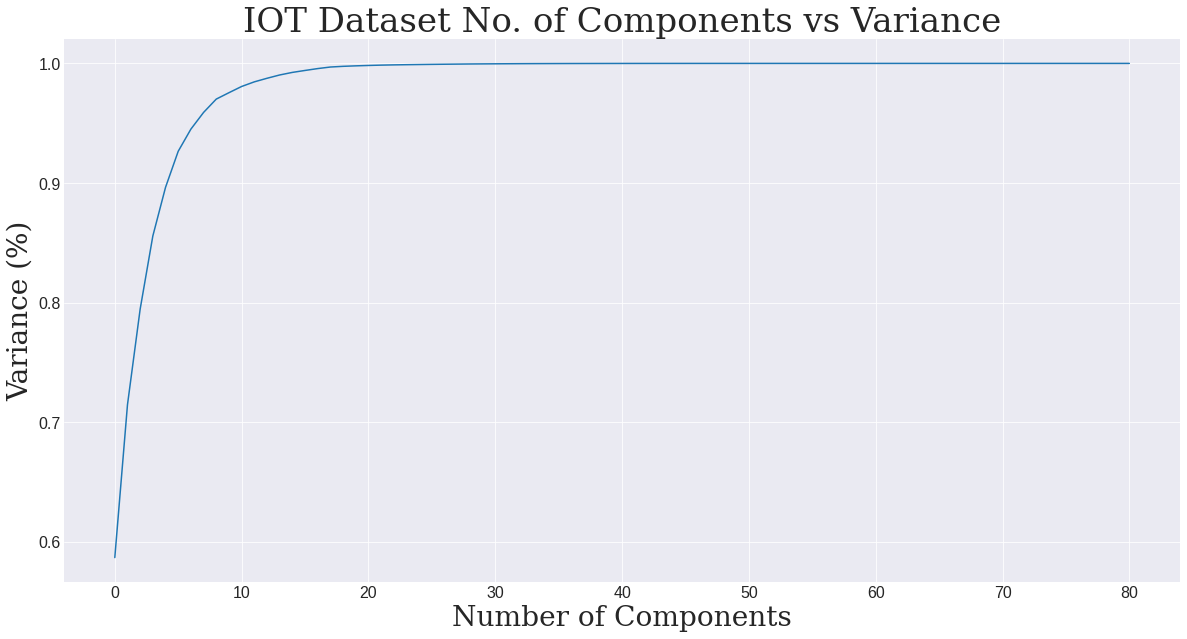

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(x1)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

In [ ]:
model=PCA(n_components=14).fit(data_rescaled)
X_pc = model.transform(data_rescaled)
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
 
initial_feature_names =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81']
 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
 
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
 
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

,0,1
0,PC1,44
1,PC10,71
2,PC11,71
3,PC12,16
4,PC13,2
5,PC14,4
6,PC2,52
7,PC3,52
8,PC4,46
9,PC5,49


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(x2)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

In [ ]:
model=PCA(n_components=14).fit(data_rescaled)
X_pc = model.transform(data_rescaled)
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
 
initial_feature_names =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81']
 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
 
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
 
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(x3)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

In [ ]:
model=PCA(n_components=14).fit(data_rescaled)
X_pc = model.transform(data_rescaled)
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
 
initial_feature_names =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81']
 
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
 
# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
 
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))